<a href="https://colab.research.google.com/github/KG1811/CA_IITG_1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cars.csv")

In [3]:
print(df.shape)

(398, 9)


In [4]:
print(df.columns.to_list())

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']


In [5]:
df.set_index('name', inplace=True)

In [6]:
print(df['mpg'].unique())


[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


In [7]:
df['hp_wt_ratio'] = df['horsepower'] / df['weight']
df.set_index('hp_wt_ratio', inplace=True)

In [8]:
car_with_max_hp = df[df['horsepower'] == df['horsepower'].max()]
print(car_with_max_hp.index.tolist())

[0.053763440860215055]


In [9]:
cars_with_high_mpg = df[df['mpg'] >= 35]
print(cars_with_high_mpg.shape[0])

36


In [10]:
filtered_df = df[(df['horsepower'] > 100) & (df['weight'] < 3000)]
most_common_origin = filtered_df['origin'].mode()[0]
print(most_common_origin)

usa


In [11]:
mean_acc_japan = df[df['origin'] == 'japan']['acceleration'].mean()
print(round(mean_acc_japan, 2))

16.17


In [12]:
year_highest_avg_mpg = df.groupby('model_year')['mpg'].mean().idxmax()
print(year_highest_avg_mpg)

80


In [13]:
df = pd.read_csv('Cars.csv')

median_mpg = df['mpg'].median()

above_median_df = df[df['mpg'] > median_mpg].copy()

above_median_df['hp_wt_ratio'] = above_median_df['horsepower'] / above_median_df['weight']

max_ratio = above_median_df['hp_wt_ratio'].max()

best_cars = above_median_df[above_median_df['hp_wt_ratio'] == max_ratio]

print(best_cars['name'].tolist())

['bmw 2002']


<Figure size 1000x600 with 0 Axes>

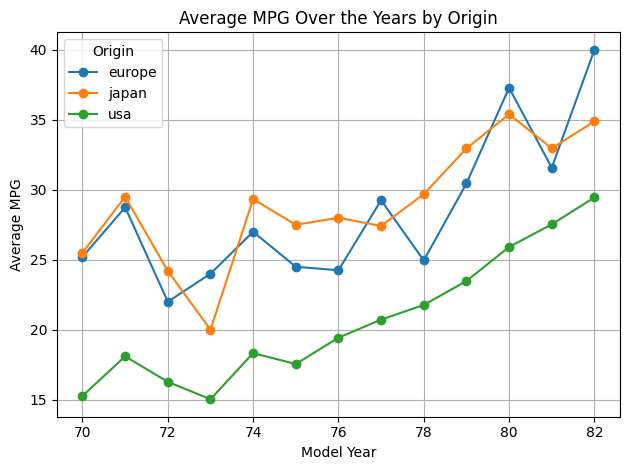

In [18]:

df_reset = df.reset_index()
avg_mpg_by_year_origin = df_reset.groupby(['model_year', 'origin'])['mpg'].mean().unstack()
plt.figure(figsize=(10, 6))
avg_mpg_by_year_origin.plot(marker='o')
plt.title('Average MPG Over the Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.legend(title='Origin')
plt.tight_layout()
plt.show()

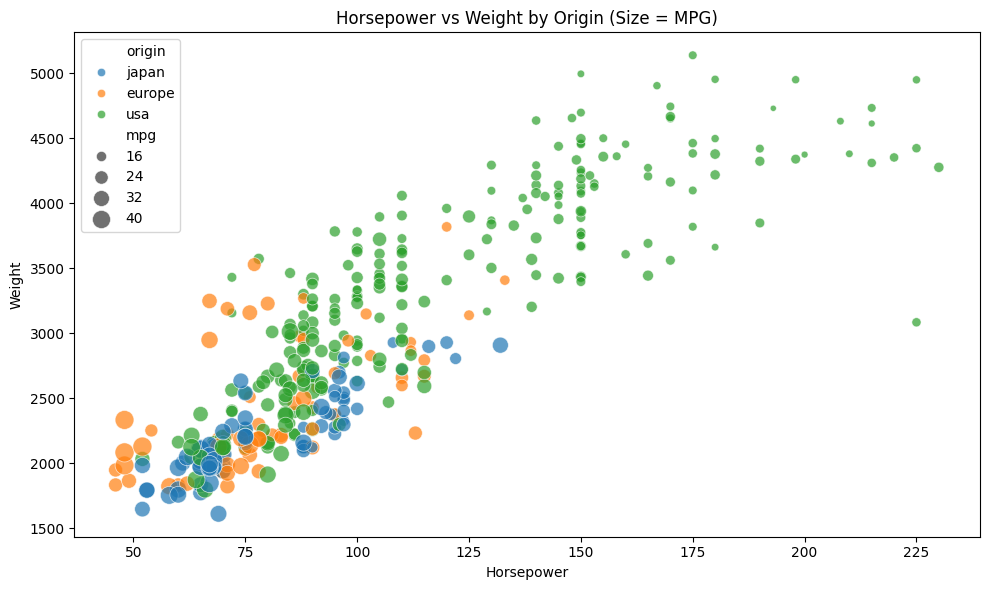

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_reset,
    x='horsepower',
    y='weight',
    hue='origin',
    size='mpg',
    sizes=(20, 200),
    alpha=0.7,
    hue_order=['japan', 'europe', 'usa']
)
plt.title('Horsepower vs Weight by Origin (Size = MPG)')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
df = pd.read_csv('Cars.csv')
model_counts = df.groupby('name')['model_year'].nunique()
multi_year_models = model_counts[model_counts > 1].index
multi_year_df = df[df['name'].isin(multi_year_models)]
stats_df = multi_year_df.groupby('name').agg(
    mpg_std=('mpg', 'std'),
    appearances=('mpg', 'count'),
    avg_mpg=('mpg', 'mean')
).reset_index()
consistent_models = stats_df[stats_df['mpg_std'] < 1.0]
consistent_models_sorted = consistent_models.sort_values(
    by=['appearances', 'avg_mpg'],
    ascending=[False, False]
)
print("Consistent Car Models (std mpg < 1.0, produced in multiple years):")
print(consistent_models_sorted)

Consistent Car Models (std mpg < 1.0, produced in multiple years):
                         name   mpg_std  appearances    avg_mpg
26           ford galaxie 500  0.577350            3  14.333333
41          plymouth fury iii  0.577350            3  14.333333
49        toyota corolla 1200  0.707107            2  31.500000
35                  mazda 626  0.212132            2  31.450000
53          volkswagen rabbit  0.353553            2  29.250000
21               datsun pl510  0.000000            2  27.000000
45                  saab 99le  0.707107            2  24.500000
51             toyota mark ii  0.707107            2  19.500000
22                dodge aspen  0.353553            2  18.850000
10  chevrolet chevelle malibu  0.707107            2  17.500000
4            amc matador (sw)  0.707107            2  14.500000
28      ford gran torino (sw)  0.707107            2  13.500000
29                   ford ltd  0.707107            2  13.500000
